# IFSAA

Problem Overview: The goal of this project is to build a client retention model for the IFSSA food hamper distribution program, which aims to predict whether a client will be retained or churned based on a combination of historical interaction data and environmental influences. Retention is classified into two categories: "retained" or "churned," with the target variable being the retention label.

Machine Learning Model Type: This is a classification task. We are interested in predicting the binary outcome ("retained" or "churned") based on historical behavior and external factors. The model will help identify at-risk clients, allowing the program to tailor its outreach strategies and services.

Importing modules and libraries

In [1]:
import numpy as np
import pandas as pd
import math as mt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot

# Scikit-Learn imports
from sklearn.model_selection import (
    train_test_split, StratifiedKFold, KFold, cross_val_score, cross_validate,
    GridSearchCV, RandomizedSearchCV
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures, FunctionTransformer
)
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    root_mean_squared_error, mean_squared_error, mean_absolute_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve,
    PrecisionRecallDisplay, classification_report
)

# Machine Learning Models

from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier,
)

from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import  XGBClassifier



# Model Saving/Loading
import joblib

In [2]:
#!pip install --upgrade numpy
!pip install --upgrade catboost

In [3]:
!pip uninstall -y catboost numpy
!pip install --no-cache-dir numpy catboost


Found existing installation: catboost 1.2.7
Uninstalling catboost-1.2.7:
  Successfully uninstalled catboost-1.2.7
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 62.0/62.0 kB 2.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 61.0/61.0 kB 16.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 98.7/98.7 MB 123.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 18.3/18.3 MB 145.4 MB/s eta 0:00:00


In [4]:
!pip uninstall -y catboost numpy
!pip install --no-cache-dir numpy catboost


Found existing installation: catboost 1.2.7
Uninstalling catboost-1.2.7:
  Successfully uninstalled catboost-1.2.7
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 62.0/62.0 kB 2.4 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 61.0/61.0 kB 13.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 98.7/98.7 MB 75.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 18.3/18.3 MB 198.2 MB/s eta 0:00:00


In [5]:
from catboost import CatBoostClassifier

# Block 1: Feature Review and Enhancement

The feature engineering section was reviewed and we created the following features:


1. **return_binary**: Our target column which will show whether a client will return or not in the next 60 days. This was modified after feedback from demo 1. It returns a ("Yes"/"No") per rolling 60-day period. This helps capture patterns across time even if a client has gaps in visits.
2. **days_since_last_pickup**: Tracks the number of days since the last pickup. Purpose: Indicates client interaction frequency; frequent pickups suggest higher engagement.
3. **days_diff_scheduled_actual**: Measures the difference between scheduled and actual pickup dates. Purpose: Assesses service punctuality; large differences may indicate inefficiency.  
4. **rescheduled_flag**: Binary flag indicating if the pickup was rescheduled (1 = Yes, 0 = No). Purpose: Flags clients with rescheduled pickups; may reflect client behavior or service issues.             
5. **month**: Extracts the month number from the pickup date. Purpose: Captures seasonal trends in demand and client engagement.                
6. **total_visits**: This feature sums the total number of visits (or pickups) made in each neighborhood or location cluster. It helps identify areas with higher service demand.            
7. **avg_days_between_pickups**:  Calculates the average gap between consecutive visits for each client, indicating how often they access the service.    
8. **is_single_pickup**:  This stores the clients who have picked up hampers just once. It helps establish behavioral patterns amongst the clients.                             
9. **latitude**: Coordinates were gotten from the addresses using Google API                    
10.** longitude**: Also extracted using Google API               
11. **distance_to_center**: This measures the distance between the pickup location and the client's address.        
12. **location_cluster**:  allows for spatial analysis, enabling insights into the distribution of demand and client activity across different areas. This can help optimize resource allocation for service delivery.

**Handling Outliers**: The outliers in the the pickup_date and collect_scheduled_date were also eliminated by dropping the months with missing data.

**Feature Correlation and Selection** - This was carried out using Pearson and Chi-square but did not improve the model performance. Using all the features gave a better performing model.


In [20]:
data = pd.read_csv('df.csv')

In [21]:
# Make a copy of the dataset
df = data.copy()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6909 entries, 0 to 6908
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   agent_related               6909 non-null   object 
 1   new_client_id               6909 non-null   object 
 2   collect_scheduled_date      6909 non-null   object 
 3   collect_token               6909 non-null   object 
 4   datetime_from               6909 non-null   object 
 5   datetime_to                 6909 non-null   object 
 6   hamper_type                 6909 non-null   object 
 7   pickup_date                 6909 non-null   object 
 8   related_scheduler           6909 non-null   object 
 9   unique_client               6909 non-null   object 
 10  Creation Date               6909 non-null   object 
 11  Modified Date               6909 non-null   object 
 12  Creator                     6909 non-null   object 
 13  unique id                   6909 

Dropping more datetime_to, datetime_from, longitude, lattitude, rescheduled_flag and address as we already created new features such as distance_to_center and location_clusters

In [23]:
# Drop datetime_to, datetime_from and address,longitude, latitude and rescheduled_flag columns
df = df.drop(columns=['datetime_to', 'datetime_from', 'address', 'longitude', 'latitude', 'rescheduled_flag'])

## Handling Outliers in Pickup and Scheduled Dates

We observed that outliers exist in the pickup dates and  collect scheduled date between 2023-07 to 2023-09 and 2024-10 to 2025-09. These periods were dropped from the dataframe.

In [34]:
import pandas as pd

# Converting pickup date to datetime format
df['pickup_date'] = pd.to_datetime(df['pickup_date'])

# Get the earliest (start) date
start_date = df['pickup_date'].min()

# Get the latest (end) date
end_date = df['pickup_date'].max()

print("Start Date:", start_date)
print("End Date:", end_date)

Start Date: 2023-11-01 13:37:00
End Date: 2024-08-26 15:13:00


In [35]:
import pandas as pd
# Converting 'collect_scheduled_date' to datetime format
df['collect_scheduled_date'] = pd.to_datetime(df['collect_scheduled_date'])

# Get the earliest (start) date
start_date = df['collect_scheduled_date'].min()

# Get the latest (end) date
end_date = df['collect_scheduled_date'].max()

print("Start Date:", start_date)
print("End Date:", end_date)

Start Date: 2023-10-30 03:00:00
End Date: 2025-06-13 03:00:00


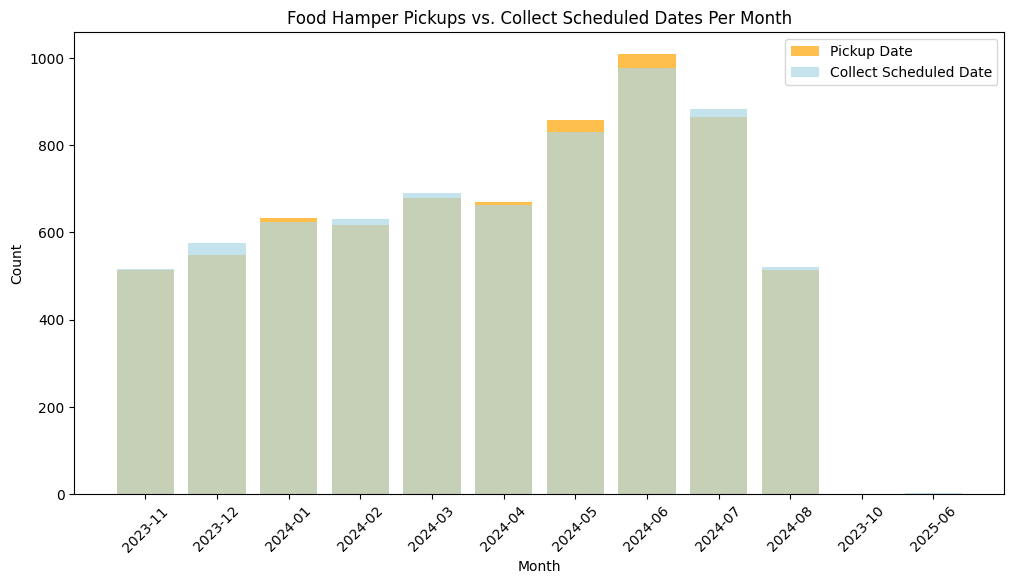

In [36]:
# Group by month for both pickup_date and collect_scheduled_date
pickup_counts = df.groupby(df["pickup_date"].dt.to_period("M")).size()
collect_counts = df.groupby(df["collect_scheduled_date"].dt.to_period("M")).size()

# Convert PeriodIndex to string for plotting
pickup_counts.index = pickup_counts.index.astype(str)
collect_counts.index = collect_counts.index.astype(str)

# Plot both on the same figure
plt.figure(figsize=(12, 6))
plt.bar(pickup_counts.index, pickup_counts, color="orange", alpha=0.7, label="Pickup Date")
plt.bar(collect_counts.index, collect_counts, color="lightblue", alpha=0.7, label="Collect Scheduled Date")

# Labels and title
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Food Hamper Pickups vs. Collect Scheduled Dates Per Month")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend()  # Add legend

plt.show()


## Feature Correlation and Selection by Pearson

In [27]:
df_corr_pearson = df.copy()

In [28]:
df_corr_pearson['return_binary'] = df_corr_pearson['return_binary'].map({'Yes': 1, 'No': 0})

Selected Features based on Pearson Correlation: ['month', 'total_visits', 'avg_days_between_pickups']


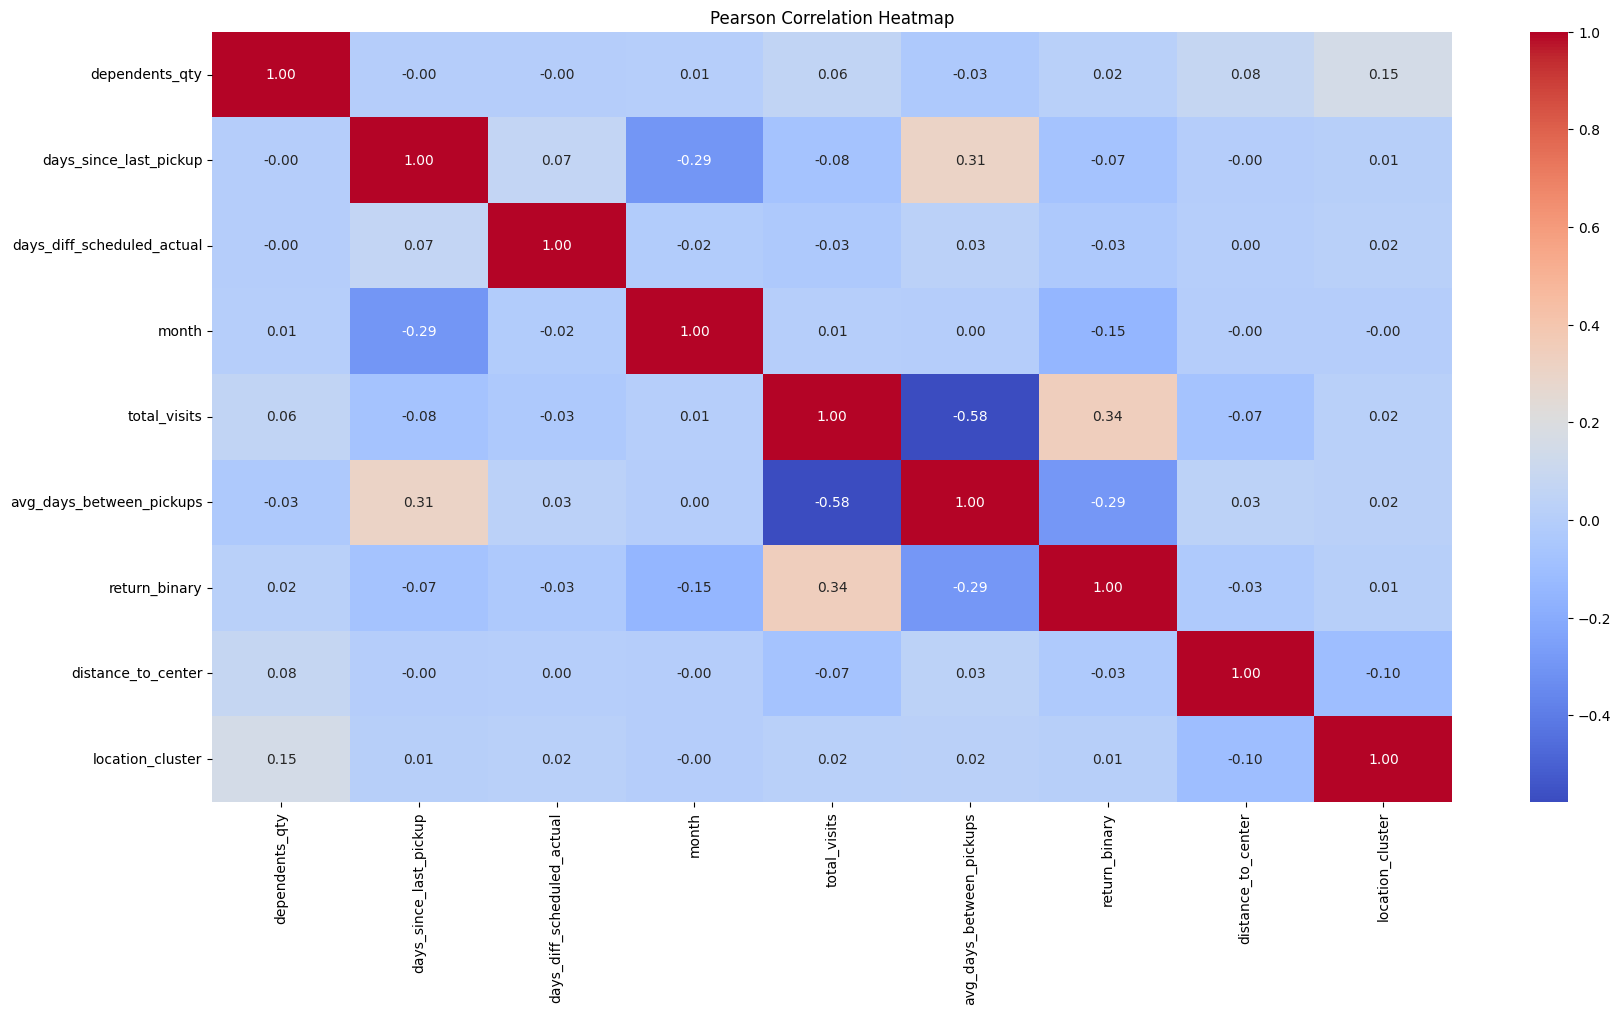

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Filter numeric columns only
df_numeric = df_corr_pearson.select_dtypes(include=[np.number])

# Compute Pearson correlation matrix
correlation_matrix = df_numeric.corr()

# Step 3: Get correlation values for the target variable
if 'return_binary' in correlation_matrix.columns:
    correlation_target = correlation_matrix['return_binary'].drop('return_binary')

    # Step 4: Select features with strong correlation (absolute correlation > 0.1)
    selected_features = correlation_target[abs(correlation_target) > 0.1].index.tolist()

    # Print selected features
    print("Selected Features based on Pearson Correlation:", selected_features)
else:
    print("Error: 'return_binary' column not found in numeric data.")

# Optional: Heatmap for visualization
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()




In [30]:
selected_features

['month', 'total_visits', 'avg_days_between_pickups']

## Feature Correlation  and Selection by Chi-square

In [ ]:
df_corr_chi  = df.copy()

In [ ]:
df_corr_chi['return_binary'] = df_corr_chi['return_binary'].map({'Yes': 1, 'No': 0})

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

def perform_chi_square_feature_selection(df, target_col='return_binary', p_value_threshold=0.05):
    """
    Perform chi-square feature selection on the given DataFrame with NaN handling.

    Parameters:
    df (pandas.DataFrame): The encoded DataFrame containing features and target
    target_col (str): The name of the target column
    p_value_threshold (float): Threshold for p-values (features with p-values below this threshold are selected)

    Returns:
    pandas.DataFrame: DataFrame with selected features
    dict: Feature scores and p-values
    """
    # Filter out non-numeric columns
    df_numeric = df_corr_chi.select_dtypes(include=['int64', 'float64'])

    # Separate features and target
    X = df_numeric.drop(columns=[target_col])
    y = df_numeric[target_col]

    # Handle missing values using SimpleImputer (median strategy for numerical data)
    print("Handling missing values...")
    imputer = SimpleImputer(strategy='median')
    X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

    # Make sure there are no negative values (chi2 requires non-negative values)
    for col in X_imputed.columns:
        if X_imputed[col].min() < 0:
            print(f"Scaling column {col} (has negative values)")
            X_imputed[col] = (X_imputed[col] - X_imputed[col].min()) / (X_imputed[col].max() - X_imputed[col].min())

    # Apply chi-square feature selection
    print("Applying chi-square feature selection...")
    selector = SelectKBest(chi2, k='all')  # Use 'all' to get scores and p-values for all features
    selector.fit(X_imputed, y)

    # Get feature scores and p-values
    scores = selector.scores_
    p_values = selector.pvalues_

    # Create a DataFrame with feature names, scores, and p-values
    feature_scores = pd.DataFrame({
        'Feature': X.columns,
        'Chi2_Score': scores,
        'P_Value': p_values
    })

    # Sort by chi-square score in descending order
    feature_scores = feature_scores.sort_values('Chi2_Score', ascending=False)

    # Select features based on p-value threshold
    selected_features = feature_scores[feature_scores['P_Value'] < p_value_threshold]['Feature'].tolist()

    # Create DataFrame with selected features (using original data)
    df_selected = df_numeric[selected_features + [target_col]]

    return df_selected, feature_scores


def visualize_feature_importance(feature_scores, top_n=20):
    """
    Visualize feature importance based on chi-square scores.

    Parameters:
    feature_scores (pandas.DataFrame): DataFrame containing feature scores
    top_n (int): Number of top features to display
    """
    plt.figure(figsize=(12, 8))

    # Plot top features
    top_features = feature_scores.head(top_n)
    sns.barplot(x='Chi2_Score', y='Feature', data=top_features)

    plt.title(f'Top {top_n} Features by Chi-Square Score', fontsize=15)
    plt.xlabel('Chi-Square Score', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.tight_layout()
    plt.show()

    # Plot p-values for top features (lower is better)
    plt.figure(figsize=(12, 8))
    sns.barplot(x='P_Value', y='Feature', data=top_features)

    plt.title(f'P-Values for Top {top_n} Features', fontsize=15)
    plt.xlabel('P-Value (lower is better)', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.axvline(x=0.05, color='red', linestyle='--', label='p=0.05 threshold')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Apply the feature selection with a p-value threshold of 0.05
p_value_threshold = 0.05
df_selected, feature_scores = perform_chi_square_feature_selection(df_corr_chi, p_value_threshold=p_value_threshold)

# Display the results
print("\nSelected features based on p-value threshold (p < {}):".format(p_value_threshold))
print(feature_scores[feature_scores['P_Value'] < p_value_threshold])

# Visualize feature importance
visualize_feature_importance(feature_scores)

# Correlation matrix of selected features (with NaN handling)
plt.figure(figsize=(14, 10))
correlation_matrix = df_selected.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Selected Features')
plt.tight_layout()
plt.show()

# Return the selected features DataFrame
df_selected.head(10)

# **Block 2: Model Selection & Training**





This section covers the process of selecting and training the model. 7 models were selected based on research about the best models for classification problems.


1.  **Cat Boosting**: This model handles categorical features and automatically manages overfitting through regularization parameters.
2.  **K-Nearest Neighbors**: This was selected for simplicity and effectiveness in capturing local patterns in the data, especially when the decision boundary is non-linear.
3.   **Decision Tree**:  is useful for its interpretability and ability to capture non-linear relationships by splitting data based on feature thresholds.
4. **LightGBM**: This model is highlly efficient with large datasets like ours. It also has fast traing speed.
5.  ** Random Forest Classifier**: Has the ability to handle high-dimensional data, reduce overfitting through ensemble learning, and provide feature importance insights.
6.   **Gradient Boosting**: Has a sequential technique that builds trees to correct errors from previous trees, often achieving high accuracy by focusing on difficult-to-classify instances.
7.   **XGBoost**: This has speed, scalability, and efficiency in handling large datasets with its gradient boosting framework and regularization techniques to prevent overfitting.



**Data splitting** - split the data using the train-tes split. The train-test split was performed based on the unique client IDs rather than random records. This ensures that the same clients do not appear in both the training and testing sets, preventing data leakage and providing a more realistic evaluation of model performance on unseen data.

**Feature Encoding** - One-hot encoding with most frequent imputation transforms categorical variables into binary features while handling missing values with the most common category. It ensures that the model interprets categorical data correctly without assuming any ordinal relationship.

**Normalization** - data was normalized using the StandardScaler as it is good for models which are sensitive to scales. It ensures that features with larger magnitudes do not dominate the model training process. The tree models - decision tree, Gradient Boosting and XGBoost work well with any scaling method.

**Stratified K-fold Cross Validation**- Used stratified 5-fold cross-validation to ensure reliable performance estimates

**Best performing Model** - The best performing model is XGBoost with an average f1-score of 0.9269

In [37]:
# Making a copy of the cleaned dataframe
df_copy = df.copy()

Map the target column or return category as  1 and O

In [38]:
df_copy['return_binary'] = df_copy['return_binary'].map({'Yes': 1, 'No': 0})

In [39]:
import pandas as pd

pd.set_option('display.max_rows', None)  # Display all rows
df_copy.head()

agent_related                     new_client_id  \
0  1668808073027x270650348760266270  1669658091582x874637848970788900   
1  1668808073027x270650348760266270  1669658091582x874637848970788900   
2  1668808073027x270650348760266270  1673043106565x702758294392930300   
3  1668808073027x270650348760266270  1673043106565x702758294392930300   
4  1668808073027x270650348760266270  1673043106565x702758294392930300   

  collect_scheduled_date collect_token                       hamper_type  \
0    2024-04-18 03:00:00        FP4WI9  1689345897790x875227980928652300   
1    2024-05-18 03:00:00        1KX81F  1689345897790x875227980928652300   
2    2024-04-18 03:00:00        QDWTTZ  1689345897790x875227980928652300   
3    2024-05-18 03:00:00        85L7QJ  1689345897790x875227980928652300   
4    2024-05-18 03:00:00        85L7QJ  1689345897790x875227980928652300   

          pickup_date                 related_scheduler  \
0 2024-04-19 00:22:00  1713496895503x822709837442842600   
1 2024-05-02 17:27:00  1713496895503x822709837442842600   
2 2024-05-01 15:48:00  1706204405955x558853613939589100   
3 2024-05-31 11:36:00  1706204405955x558853613939589100   
4 2024-05-31 11:36:00  1706204405955x558853613939589100   

                      unique_client        Creation Date        Modified Date  \
0  1669658091582x874637848970788900  2024-04-19 00:21:00  2024-04-19 00:22:00   
1  1669658091582x874637848970788900  2024-04-19 00:21:00  2024-05-02 17:27:00   
2  1673043106565x702758294392930300  2024-01-25 14:40:00  2024-05-01 15:48:00   
3  1673043106565x702758294392930300  2024-01-25 14:40:00  2024-05-31 11:36:00   
4  1673043106565x702758294392930300  2024-07-30 21:33:00  2024-08-02 11:34:00   

   ... age_group days_since_last_pickup  days_diff_scheduled_actual month  \
0  ...  [35, 40)                      0                           0     4   
1  ...  [35, 40)                     13                         -16     5   
2  ...  [35, 40)                      0                          13     5   
3  ...  [35, 40)                     29                          13     5   
4  ...  [35, 40)                      0                          13     5   

  total_visits avg_days_between_pickups is_single_pickup return_binary  \
0            2                     13.0            False             1   
1            2                     13.0            False             0   
2            6                     19.6            False             1   
3            6                     19.6            False             1   
4            6                     19.6            False             1   

  distance_to_center location_cluster  
0           5.036258                2  
1           5.036258                2  
2           3.324801                2  
3           3.324801                2  
4           3.324801                2  

[5 rows x 31 columns]

In [40]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6909 entries, 0 to 6908
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   agent_related               6909 non-null   object        
 1   new_client_id               6909 non-null   object        
 2   collect_scheduled_date      6909 non-null   datetime64[ns]
 3   collect_token               6909 non-null   object        
 4   hamper_type                 6909 non-null   object        
 5   pickup_date                 6909 non-null   datetime64[ns]
 6   related_scheduler           6909 non-null   object        
 7   unique_client               6909 non-null   object        
 8   Creation Date               6909 non-null   object        
 9   Modified Date               6909 non-null   object        
 10  Creator                     6909 non-null   object        
 11  unique id                   6909 non-null   object      

## Data split, Encoding, Model Training and Evaluation

In [42]:
# Define Features
categorical_features = [
    'agent_related', 'new_client_id', 'hamper_type', 'related_scheduler', 'unique_client', 'Creator', 'unique id',
    'family', 'household', 'preferred_contact_methods',
    'preferred_languages', 'sex', 'status', 'age_group', 'dw', 'year_month']


numerical_features = [
    'dependents_qty', 'days_since_last_pickup', 'days_diff_scheduled_actual',
    'month', 'total_visits', 'avg_days_between_pickups',
    'distance_to_center', 'location_cluster'
]

binary_features = ['is_single_pickup']  # Keep as-is


# Ensure same clients do not appear in both train & test
unique_clients = df_copy["new_client_id"].unique().tolist()  # Convert to list explicitly

train_clients = unique_clients[:int(0.8 * len(unique_clients))]
test_clients = unique_clients[int(0.8 * len(unique_clients)):]  # Ensure the slice is a list

train_df = df_copy[df_copy["new_client_id"].isin(train_clients)]
test_df = df_copy[df_copy["new_client_id"].isin(test_clients)]


train_df = df_copy[df_copy["new_client_id"].isin(train_clients)]
test_df = df_copy[df_copy["new_client_id"].isin(test_clients)]

# Define features and target
X_train = train_df[categorical_features + numerical_features + binary_features]
y_train = train_df["return_binary"]
X_test = test_df[categorical_features + numerical_features + binary_features]
y_test = test_df["return_binary"]

# Define Transformers
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Combine into ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])



models = {
    "Cat Boosting": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', CatBoostClassifier(
            iterations=500, learning_rate=0.05, depth=6, l2_leaf_reg=3, verbose=0, random_state=42
        ))
    ]),

    "K-Nearest Neighbors": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', KNeighborsClassifier(
            n_neighbors=7, weights='distance', metric='minkowski'
        ))
    ]),

    "Decision Tree": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier(
            max_depth=10, min_samples_split=10, random_state=42
        ))
    ]),

    "LightGBM": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LGBMClassifier(
            n_estimators=500, learning_rate=0.03, max_depth=7, num_leaves=20, min_data_in_leaf=20, subsample=0.8, scale_pos_weight=0.26, random_state=42
        ))
    ]),

    "Random Forest": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(
            n_estimators=200, max_depth=10, min_samples_split=5, random_state=42
        ))
    ]),

    "Gradient Boosting": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', GradientBoostingClassifier(
            n_estimators=200, learning_rate=0.05, max_depth=5, subsample=0.8, random_state=42
        ))
    ]),

    "XGBoost": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', XGBClassifier(
            n_estimators=200, learning_rate=0.05, max_depth=6, subsample=0.8, eval_metric='logloss', random_state=42
        ))
    ])
}

# Cross-validation setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Train and Evaluate Each Model
best_model = None
best_score = 0
best_params = {}
results = {}

# Train and evaluate models
for name, model in models.items():
    print(f"\nTraining {name}...")

    scores = [] # Initialize an empty list to store scores
    roc_auc_scores = [] # Initialize an empty list to store ROC AUC scores

    for train_index, val_index in skf.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Apply preprocessing
        # Fit the training fold and transformed on the validation fold
        model.fit(X_train_fold, y_train_fold)

        # Evaluate
        y_pred = model.predict(X_val_fold)
        precision = precision_score(y_val_fold, y_pred)
        recall = recall_score(y_val_fold, y_pred)
        f1 = f1_score(y_val_fold, y_pred)
        roc_auc = roc_auc_score(y_val_fold, y_pred)

        # Append scores for each fold
        scores.append(f1)
        roc_auc_scores.append(roc_auc)  # Append ROC AUC score

        # store results for current fold to dictionary
        results[name] = {'precision': precision, 'recall': recall, 'f1_score': f1, 'roc_auc': roc_auc}

        print(f"{name} Metrics:")
        print(f" - Precision: {precision:.2f}")
        print(f" - Recall: {recall:.2f}")
        print(f" - F1-Score: {f1:.2f}")
        print(f" - ROC AUC: {roc_auc:.2f}\n")

    avg_f1 = np.mean(scores)
    avg_precision = np.mean([result['precision'] for result in results.values()])
    avg_recall = np.mean([result['recall'] for result in results.values()])
    avg_roc_auc = np.mean(roc_auc_scores)

    print(f"Average Precision: {avg_precision:.4f}")
    print(f"Average F1-score: {avg_f1:.4f}")
    print(f"Average ROC AUC: {avg_roc_auc:.4f}")
    print(f"Average Recall: {avg_recall:.4f}")


    # Track best model
    if avg_f1 > best_score:
        best_score = avg_f1
        best_model = model
        best_params = model.get_params()

# Evaluate best model on test set

y_test_pred = best_model.predict(X_test)

#print("\nBest Model Performance on Test Set:")
print("="*40)
print(f"Best Model: {best_model.__class__.__name__}")
print(f"Best F1-Score: {best_score:.2f}")
print("="*40)
print(classification_report(y_test, y_test_pred))



# Save best model
joblib.dump(best_model, "best_model.pkl")
print(f"\nBest model '{best_model.named_steps['classifier'].__class__.__name__}' saved with F1-score: {best_score:.4f}")



Training Cat Boosting...
Cat Boosting Metrics:
 - Precision: 0.88
 - Recall: 0.98
 - F1-Score: 0.93
 - ROC AUC: 0.75

Cat Boosting Metrics:
 - Precision: 0.88
 - Recall: 0.98
 - F1-Score: 0.93
 - ROC AUC: 0.73

Cat Boosting Metrics:
 - Precision: 0.88
 - Recall: 0.98
 - F1-Score: 0.93
 - ROC AUC: 0.74

Cat Boosting Metrics:
 - Precision: 0.88
 - Recall: 0.98
 - F1-Score: 0.93
 - ROC AUC: 0.74

Cat Boosting Metrics:
 - Precision: 0.87
 - Recall: 0.97
 - F1-Score: 0.92
 - ROC AUC: 0.72

Average Precision: 0.8744
Average F1-score: 0.9266
Average ROC AUC: 0.7348
Average Recall: 0.9712

Training K-Nearest Neighbors...
K-Nearest Neighbors Metrics:
 - Precision: 0.81
 - Recall: 0.96
 - F1-Score: 0.88
 - ROC AUC: 0.54

K-Nearest Neighbors Metrics:
 - Precision: 0.82
 - Recall: 0.97
 - F1-Score: 0.89
 - ROC AUC: 0.58

K-Nearest Neighbors Metrics:
 - Precision: 0.82
 - Recall: 0.96
 - F1-Score: 0.88
 - ROC AUC: 0.57

K-Nearest Neighbors Metrics:
 - Precision: 0.82
 - Recall: 0.96
 - F1-Score: 0

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Number of positive: 3758, number of negative: 986
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000590 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 895
[LightGBM] [Info] Number of data points in the train set: 4744, number of used features: 99
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.792159 -> initscore=1.337986
[LightGBM] [Info] Start training from score 1.337986
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Number of positive: 3758, number of negative: 986
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000624 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 914
[LightGBM] [Info] Number of data points in the train set: 4744, number of used features: 104
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.792159 -> initscore=1.337986
[LightGBM] [Info] Start training from score 1.337986
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
LightGBM Metrics:
 - Precision: 0.92
 - Recall: 0.87
 - F1-Score: 0.90
 - ROC AUC: 0.79

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Number of positive: 3759, number of negative: 985
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000639 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 908
[LightGBM] [Info] Number of data points in the train set: 4744, number of used features: 102
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.792369 -> initscore=1.339267
[LightGBM] [Info] Start training from score 1.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Number of positive: 3759, number of negative: 985
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000624 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 908
[LightGBM] [Info] Number of data points in the train set: 4744, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.792369 -> initscore=1.339267
[LightGBM] [Info] Start training from score 1.339267
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
LightGBM Metrics:
 - Precision: 0.91
 - Recall: 0.88
 - F1-Score: 0.89
 - ROC AUC: 0.78

Average Precision: 0.8709
Average F1-score: 0.8927
Average ROC AUC: 0.7924
Average Recall: 0.9366

Training Random Forest...
Random Forest Metrics:
 - Precision: 0.79
 - Recall: 1.00
 - F1-Score: 0.88
 - ROC AUC: 0.50

Random Forest Metrics:
 - Precision: 0.79
 - Recall: 1.00
 - F1-Score: 0.88
 - ROC AUC: 0.50

Random Forest Metrics:
 - Precision: 0.79
 - Recall: 1.00
 - F1-Score: 0.88
 - ROC AUC: 0.50

Random Forest Metrics:
 - Precision: 0.79
 - Recall: 1.00
 - F1-Score: 0.88
 - ROC AUC: 0.50

Random Forest Metrics:
 - Precision: 0.79
 - Recall: 1.00
 - F1-Score: 0.88
 - ROC AUC: 0.50

Average Precision: 0.8551
Average F1-score: 0.8841
Average ROC AUC: 0.5000
Average Recall: 0.9493

Training Gradient Boosting...
Gradient Boosting Metrics:
 - Precision: 0.89
 - Recall: 0.98
 - 

# Block 3: Model Evaluation & Diagnostics

Summary table and visuals created in this section to evaluate our key metrics and compare peformances across models.

## Summary Table of the model perfomance across folds

In [43]:
import pandas as pd

# Convert evaluation_metrics to a DataFrame
metrics_df = pd.DataFrame(results)

# Transpose the DataFrame and reset index
metrics_df = metrics_df.T.reset_index()

# Rename columns
metrics_df = metrics_df.rename(columns={'index': 'Model'})

# Group by model and compute mean metrics
summary_table = metrics_df.groupby('Model').mean().reset_index()

# Display the summary table
print("Summary Table of Model Performance:")
print(summary_table)

Summary Table of Model Performance:
                 Model  precision    recall  f1_score   roc_auc
0         Cat Boosting   0.874401  0.971246  0.920283  0.720441
1        Decision Tree   0.885743  0.932907  0.908714  0.737709
2    Gradient Boosting   0.874517  0.964856  0.917468  0.719270
3  K-Nearest Neighbors   0.809269  0.966986  0.881126  0.550295
4             LightGBM   0.914349  0.875399  0.894450  0.781829
5        Random Forest   0.791737  1.000000  0.883765  0.500000
6              XGBoost   0.885069  0.959531  0.920797  0.742924


## Best performing Model bases on f1-score



In [44]:
#print("\nBest Model Performance on Test Set:")
print("="*40)
print(f"Best Model: {best_model.named_steps['classifier'].__class__.__name__}")
print(f"Best F1-Score: {best_score:.2f}")
print("="*40)
print(classification_report(y_test, y_test_pred))
print(f"\nBest model '{best_model.named_steps['classifier'].__class__.__name__}' saved with F1-score: {best_score:.4f}")

Best Model: XGBClassifier
Best F1-Score: 0.93
              precision    recall  f1-score   support

           0       0.82      0.70      0.76       250
           1       0.90      0.95      0.92       729

    accuracy                           0.88       979
   macro avg       0.86      0.83      0.84       979
weighted avg       0.88      0.88      0.88       979


Best model 'XGBClassifier' saved with F1-score: 0.9275


## Bar plot showing the metrics for all models trained

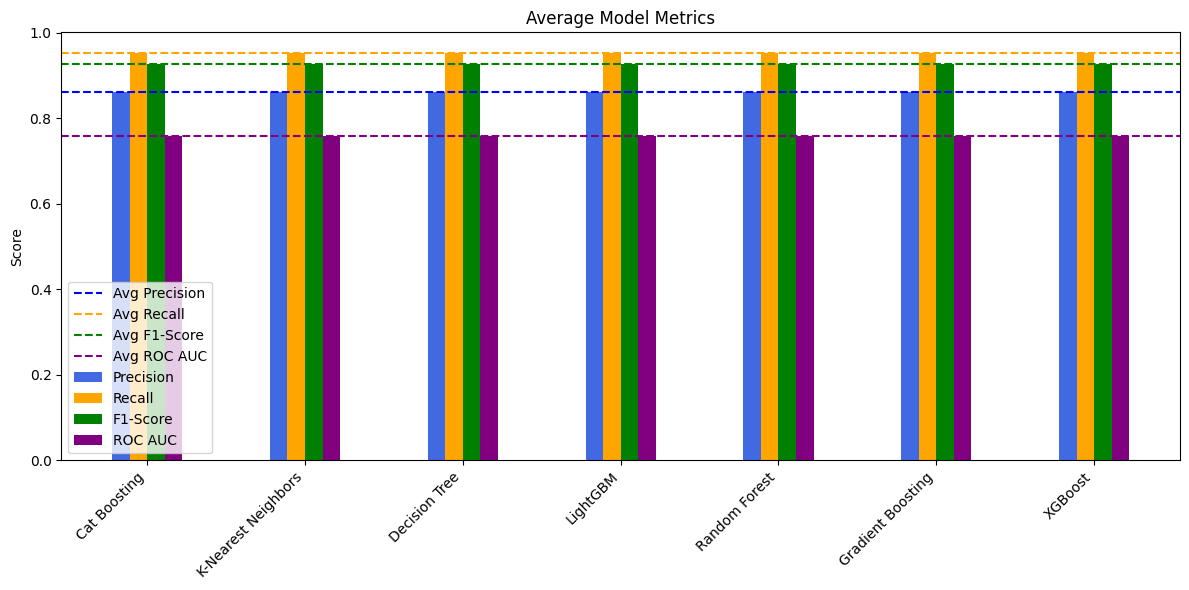

In [45]:
# Initialize lists to store evaluation metrics outside the loop
model_names = []  # List to store model names
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Train and evaluate models, appending metrics for each model
for name, model in models.items():


    # Append metrics to their respective lists for plotting
    precision_scores.append(avg_precision)
    recall_scores.append(avg_recall)
    f1_scores.append(avg_f1)
    roc_auc_scores.append(avg_roc_auc)
    model_names.append(name)  # Append model name to the list

# Create bar plot
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.2  # Width of each bar
spacing_factor = 1.8  # Controls the spacing between clusters
x_pos = np.arange(len(model_names)) * spacing_factor  # Ensure correct spacing

# Plot bars with spacing
ax.bar(x_pos, precision_scores, width=bar_width, label='Precision', color='royalblue')
ax.bar(x_pos + bar_width, recall_scores, width=bar_width, label='Recall', color='orange')
ax.bar(x_pos + 2 * bar_width, f1_scores, width=bar_width, label='F1-Score', color='green')
ax.bar(x_pos + 3 * bar_width, roc_auc_scores, width=bar_width, label='ROC AUC', color='purple')

# Add average lines
ax.axhline(y=avg_precision, color='blue', linestyle='--', label='Avg Precision')
ax.axhline(y=avg_recall, color='orange', linestyle='--', label='Avg Recall')
ax.axhline(y=avg_f1, color='green', linestyle='--', label='Avg F1-Score')
ax.axhline(y=avg_roc_auc, color='purple', linestyle='--', label='Avg ROC AUC')

# Set plot labels and title
ax.set_xticks(x_pos + 1.5 * bar_width)  # Adjust x-tick positions for readability
ax.set_xticklabels(model_names, rotation=45, ha='right')  # Rotate x-axis labels if needed
ax.set_ylabel('Score')
ax.set_title('Average Model Metrics')
ax.legend()

plt.tight_layout()
plt.show()


## Plot of confusion matrix results for all models

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


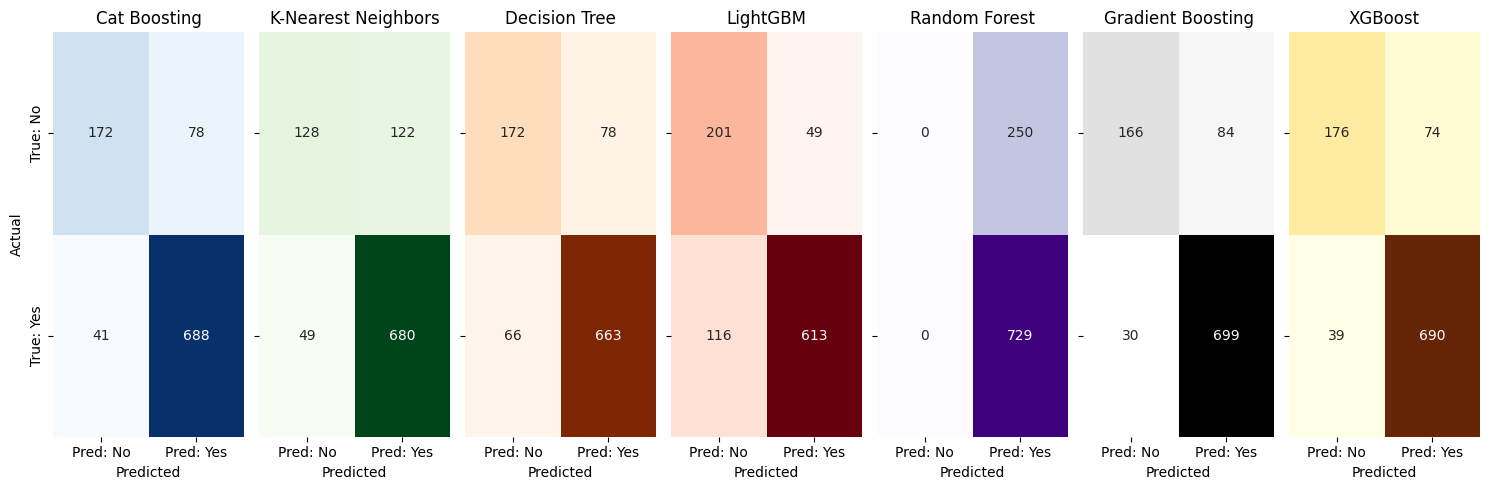

In [46]:
# Define a list of colormaps for each model's confusion matrix
colormaps = ['Blues', 'Greens', 'Oranges', 'Reds', 'Purples', 'Greys', 'YlOrBr' ]


fig, axes = plt.subplots(1, len(models), figsize=(15, 5), sharey=True)

for i, (model_name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Use the corresponding colormap for this model
    sns.heatmap(cm, annot=True, fmt='d', cmap=colormaps[i], ax=axes[i],
                cbar=False,
                xticklabels=['Pred: No', 'Pred: Yes'],
                yticklabels=['True: No', 'True: Yes'])

    axes[i].set_title(model_name)
    axes[i].set_xlabel('Predicted')

    if i == 0:
        axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

## Precision-Recall Curves for all models

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


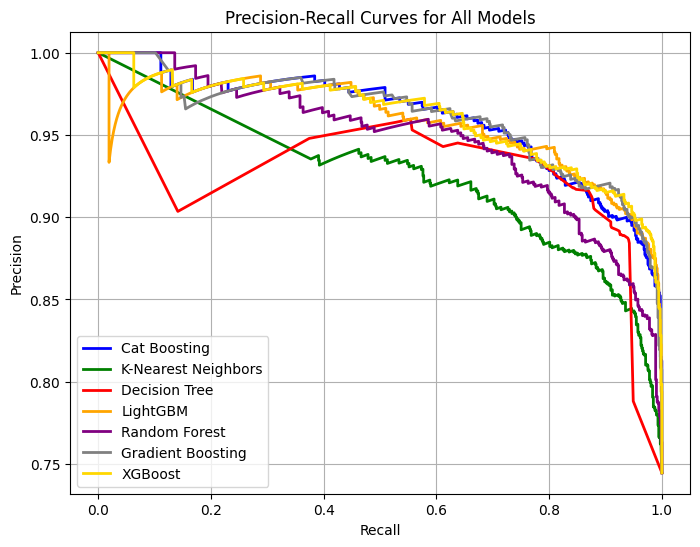

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Define colors for each model using standard color names or hexadecimal codes
colors = ['blue', 'green', 'red', 'orange', 'purple', 'grey', 'gold']  # Replace 'YlOrBr' with a valid color


plt.figure(figsize=(8, 6))

for i, (model_name, model) in enumerate(models.items()):
    y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities of the positive class
    precision, recall, _ = precision_recall_curve(y_test, y_probs)

    # Plot the curve for the current model
    plt.plot(recall, precision, color=colors[i], lw=2, label=model_name)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for All Models')
plt.legend(loc='best')  # Add legend to identify models
plt.grid(True)
plt.show()

## ROC curves for all models

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


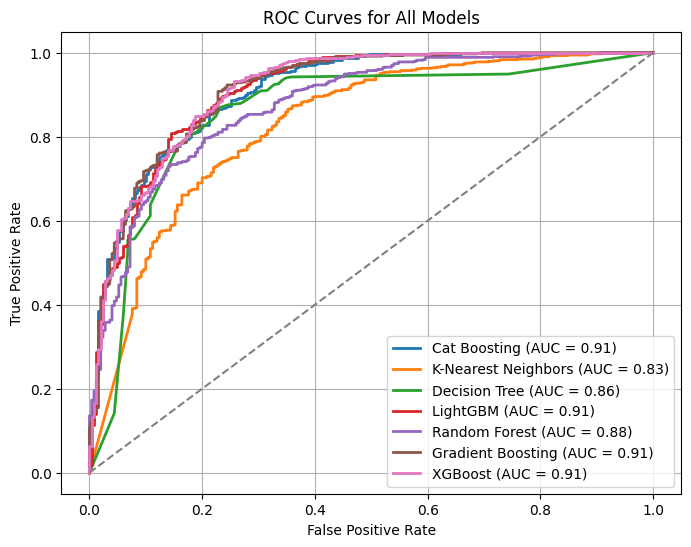

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# ... (Your existing code for model training and evaluation) ...

plt.figure(figsize=(8, 6))

for i, (model_name, model) in enumerate(models.items()):
    # Get probabilities for the positive class
    y_probs = model.predict_proba(X_test)[:, 1]

    # Get ROC curve data
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = roc_auc_score(y_test, y_probs)

    # Plot ROC curve for the current model
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Block 4: Model Optimization & Hyperparameter Tuning

## Hyperparameter Tuning of our best performing model - XGBoost

Hypertuning was carried out on our best performing model - XGBoost using Random searchCV to efficiently explore the hyperparameter space by testing 20 random combinations.  




In [50]:


# Define hyperparameter distribution for XGBoost
param_dist = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': np.linspace(0.01, 0.1, 5),
    'classifier__max_depth': [3, 5, 7, 9],
    'classifier__subsample': [0.8, 0.9, 1.0],
    'classifier__colsample_bytree': [0.8, 0.9, 1.0],
    'classifier__gamma': [0, 0.1, 0.2]  # Add gamma for regularization
}

# Retrieve the XGBoost pipeline (assuming you have it defined as 'xgboost_pipeline')
xgboost_pipeline = models["XGBoost"]

# Initialize RandomizedSearchCV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(
    xgboost_pipeline,
    param_distributions=param_dist,  # Use param_distributions instead of param_dist
    scoring='f1',
    cv=cv,
    verbose=1,
    n_jobs=-1,
    n_iter=20,
    random_state=42
)

# Fit RandomizedSearchCV
print("Performing hyperparameter tuning...")
random_search.fit(X_train, y_train)

# Get and print best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Evaluate the best model on the test set
y_test_pred = random_search.best_estimator_.predict(X_test)
print("\nBest Model Performance on Test Set:")
print(classification_report(y_test, y_test_pred))

# Save the best model
joblib.dump(random_search.best_estimator_, "best_xgboost_model.pkl")
print(f"\nBest XGBoost model saved with F1-score: {random_search.best_score_:.4f}")

Performing hyperparameter tuning...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'classifier__subsample': 0.8, 'classifier__n_estimators': 200, 'classifier__max_depth': 7, 'classifier__learning_rate': 0.01, 'classifier__gamma': 0.2, 'classifier__colsample_bytree': 0.9}

Best Model Performance on Test Set:
              precision    recall  f1-score   support

           0       0.90      0.67      0.77       250
           1       0.90      0.97      0.93       729

    accuracy                           0.90       979
   macro avg       0.90      0.82      0.85       979
weighted avg       0.90      0.90      0.89       979


Best XGBoost model saved with F1-score: 0.9292


## Feature Importance

In [70]:
# Load the trained model
best_xgboost_model = joblib.load("best_xgboost_model.pkl")  # Load the model

# Get feature names after preprocessing
# Fit the preprocessor on the training data
best_xgboost_model.named_steps['preprocessor'].fit(X_train)
# Get feature names from the preprocessor
feature_names = best_xgboost_model.named_steps['preprocessor'].get_feature_names_out()


# Access the CatBoostClassifier within the pipeline using named_steps
importances = best_xgboost_model.named_steps['classifier'].feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort by importance
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Remove 'cat_' and 'num_' prefixes from feature names
feature_importances['feature'] = feature_importances['feature'].str.replace(r'^(cat__|num__)', '', regex=True)

# Save as CSV
feature_importances.to_csv('feature_importances.csv', index=False)

# Print or visualize the feature importances
feature_importances.head(20)

feature  importance
10090                              year_month_2024-08    0.400876
4                                        total_visits    0.050034
10089                              year_month_2024-07    0.023358
3                                               month    0.020961
10087                              year_month_2024-05    0.016835
10088                              year_month_2024-06    0.012938
5                            avg_days_between_pickups    0.012709
3204                              Creator_(App admin)    0.012296
10     agent_related_1668808073027x270650348760266270    0.011877
10085                              year_month_2024-03    0.010816
10086                              year_month_2024-04    0.010547
1                              days_since_last_pickup    0.008521
2                          days_diff_scheduled_actual    0.008518
10055                                      sex_Female    0.007858
10039             preferred_languages_Somali , Arabic    0.007638
10031           preferred_languages_Persian , English    0.007426
3211         Creator_1693931047113x452984000542138600    0.007422
9973          preferred_languages_Afrikaans , English    0.007348
10056                                        sex_Male    0.006952
10023             preferred_languages_Oromo , English    0.006912

## Plot of the top 10 Features

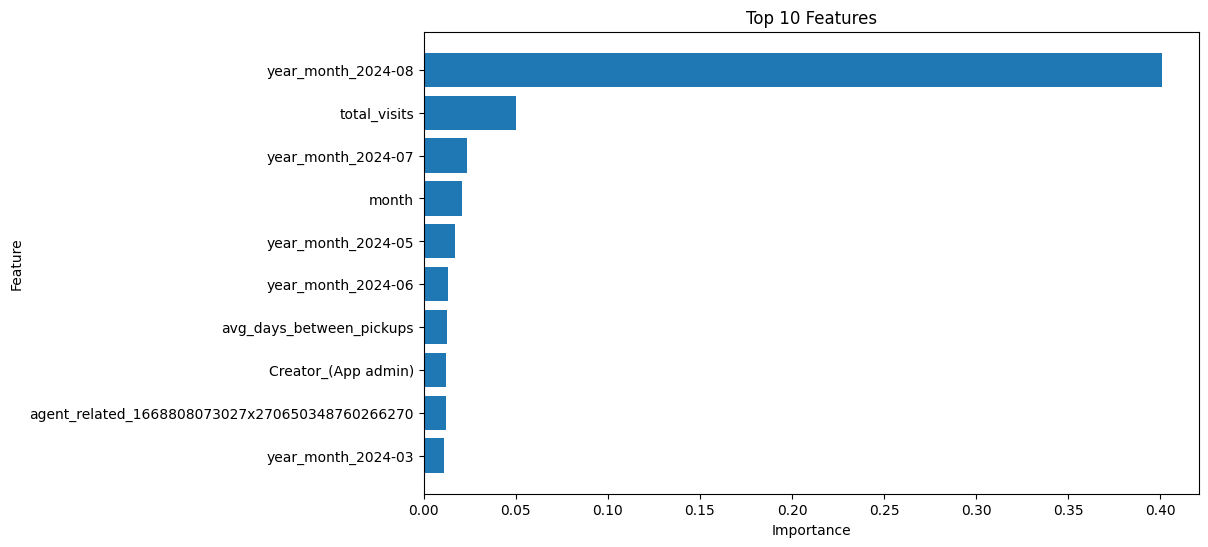

In [71]:
import matplotlib.pyplot as plt
# Select top 10 features
top_10_features = feature_importances.head(10)

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.barh(top_10_features['feature'], top_10_features['importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 10 Features")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


In [55]:
# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances.head(10))
plt.title('Top 10 Most Important Features - Tuned XGBoost')
plt.tight_layout()
plt.savefig('tuned_xgboost_feature_importance.png')
plt.close()

## Retrain Model with Top 5 features

In [74]:
# Manually specify the top features
top_features = [
    "year_month_2024-08",  # One-hot encoded feature
    "total_visits",
    "month",  # Original feature (not one-hot encoded)
    "avg_days_between_pickups",
    "Creator_(App admin)"  # One-hot encoded feature
]

# Check which top features exist in X_train
existing_features = [f for f in top_features if f in X_train.columns]
print("Existing Features in X_train:", existing_features)

# If fewer than 5 features exist, we can handle it by adding more features
# Create new training and testing sets with selected top features
X_train_top = X_train[existing_features]
X_test_top = X_test[existing_features]

# Define the pipeline
model_top5 = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier(
        subsample=0.8,
        n_estimators=200,
        max_depth=7,
        learning_rate=0.01,
        gamma=0.2,
        colsample_bytree=0.9,
        random_state=42,
        verbosity=0
    ))
])

# Train the model
model_top5.fit(X_train_top, y_train)

# Make predictions
y_pred_top = model_top5.predict(X_test_top)

# Evaluate the model
print("Selected Features:", existing_features)
print("Accuracy (Top 5 Features):", accuracy_score(y_test, y_pred_top))
print("Classification Report (Top 5 Features):\n", classification_report(y_test, y_pred_top))


Existing Features in X_train: ['total_visits', 'month', 'avg_days_between_pickups']
Selected Features: ['total_visits', 'month', 'avg_days_between_pickups']
Accuracy (Top 5 Features): 0.8774259448416751
Classification Report (Top 5 Features):
               precision    recall  f1-score   support

           0       0.88      0.60      0.71       250
           1       0.88      0.97      0.92       729

    accuracy                           0.88       979
   macro avg       0.88      0.79      0.82       979
weighted avg       0.88      0.88      0.87       979



In [75]:
# download model

import joblib

# Assuming your trained model is stored in 'model_top5'
# Save the model to a file
joblib.dump(model_top5, 'model_top5.pkl')

['model_top5.pkl']

In [ ]:
!pip install streamlit

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9.8/9.8 MB 36.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6.9/6.9 MB 42.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 79.1/79.1 kB 4.9 MB/s eta 0:00:00


In [ ]:
pip freeze > requirements.txt

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
import numpy as np

# Load the trained model with caching
@st.cache_resource
def load_model():
    try:
        return joblib.load("model_top5.pkl")  # Load the updated model
    except Exception as e:
        st.error(f"Error loading model: {e}")
        return None

model = load_model()

# Define only the top 5 features
REQUIRED_COLUMNS = [
    #"year_month_2024-08",  # One-hot encoded feature
    "total_visits",
     "month",
    "avg_days_between_pickups",
    #"days_since_last_pickup",
     #"year_month_2024-06"

    #"days_since_last_pickup"
]

# Function to preprocess input data
def preprocess_input(input_data):
    input_df = pd.DataFrame([input_data])

    # Ensure all required columns exist
    for col in REQUIRED_COLUMNS:
        if col not in input_df.columns:
            input_df[col] = 0  # Set missing columns to 0

    # Ensure the column order matches model training
    input_df = input_df[REQUIRED_COLUMNS]
    return input_df

def exploratory_data_analysis():
    st.subheader("Hamper Collection Insights")
    st.title("Power BI Visualization")
    powerbi_url = "https://app.powerbi.com/view?r=eyJrIjoiMTE4Y2JiYWQtMzNhYS00NGFiLThmMDQtMmIwMDg4YTIzMjI5IiwidCI6ImUyMjhjM2RmLTIzM2YtNDljMy05ZDc1LTFjZTI4NWI1OWM3OCJ9"
    st.components.v1.iframe(powerbi_url, width=800, height=600)


def predictions_page():
    # Streamlit app UI
    st.title("Hamper Return Prediction App")
    st.write("Enter details to predict if a client will return.")

    # User input fields (matching the top 5 important features)
    #year_month = st.selectbox("Year-Month", ["2024-08", "2024-07", "2024-06"])
    total_visits = st.number_input("Total Visits", min_value=1, max_value=100, step=1)
    avg_days_between_pickups = st.number_input("Avg Days Between Pickups", min_value=1.0, max_value=100.0, step=0.1)
    month = st.number_input("Month", min_value=1, max_value=12, step=1)
    #days_since_last_pickup = st.number_input("Days Since Last Pickup", min_value=0, step=1)
    #year_month = st.selectbox("Year-Month", ["2024-08", "2024-07", "2024-06"])

   # Prepare input data (One-hot encoding for the 'year_month' feature)
    input_data = {
    #"year_month_2024-08": 1 if year_month == "2024-08" else 0,
    #"year_month_2024-06": 1 if year_month == "2024-06" else 0,
    "total_visits": total_visits,
    "avg_days_between_pickups": avg_days_between_pickups,
    #"days_since_last_pickup": days_since_last_pickup,
    "month": month,

    }

    # Prediction button
    if st.button("Predict"):
        if model is None:
            st.error("Model not loaded. Please check if 'model_top5.pkl' exists.")
        else:
            input_df = preprocess_input(input_data)
            prediction = model.predict(input_df)
            probability = model.predict_proba(input_df)

            st.subheader("Prediction Result:")
            st.write("‚úÖ Prediction: **Yes**" if prediction[0] == 1 else "‚ùå Prediction: **No**")
            st.write(f"üìä Probability (Yes): **{probability[0][1]:.4f}**")
            st.write(f"üìä Probability (No): **{probability[0][0]:.4f}**")

# Dashboard Page
def dashboard():
    header_image_url = "https://raw.githubusercontent.com/ChiomaUU/Client-Prediction/refs/heads/main/ifssa_2844cc71-4dca-48ae-93c6-43295187e7ca.avif"
    st.image(header_image_url, use_container_width=True)  # Display the image at the top

    st.title("Hamper Return Prediction App")
    st.write("This app predicts whether a client will return for food hampers.")

# Main function to control the app
def main():
    st.sidebar.title("Navigation")
    app_page = st.sidebar.radio("Choose a page", ["Dashboard", "Insights", "Predictions"])

    if app_page == "Dashboard":
        dashboard()
    elif app_page == "Insights":
        exploratory_data_analysis()
    elif app_page == "Predictions":
        predictions_page()

# Run the app
if __name__ == "__main__":
    main()


Writing app.py


In [ ]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://104.199.167.49:8501

  Stopping...
^C


#SHAP AND XAI REPORT

SHAP values shape: (979, 25)


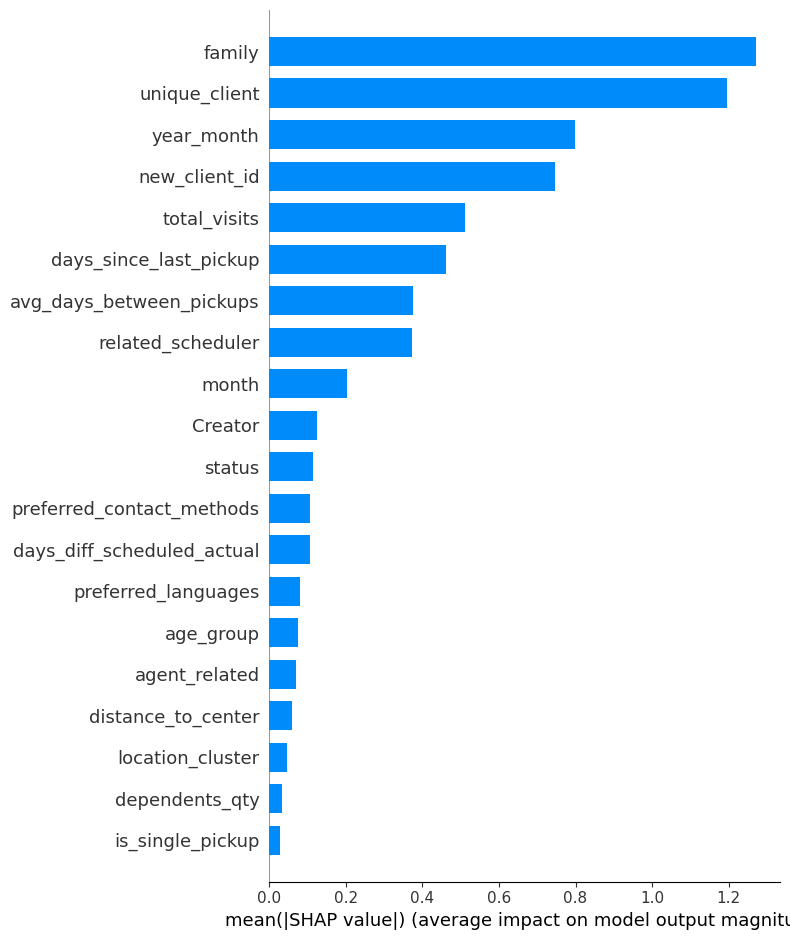

<Figure size 640x480 with 0 Axes>

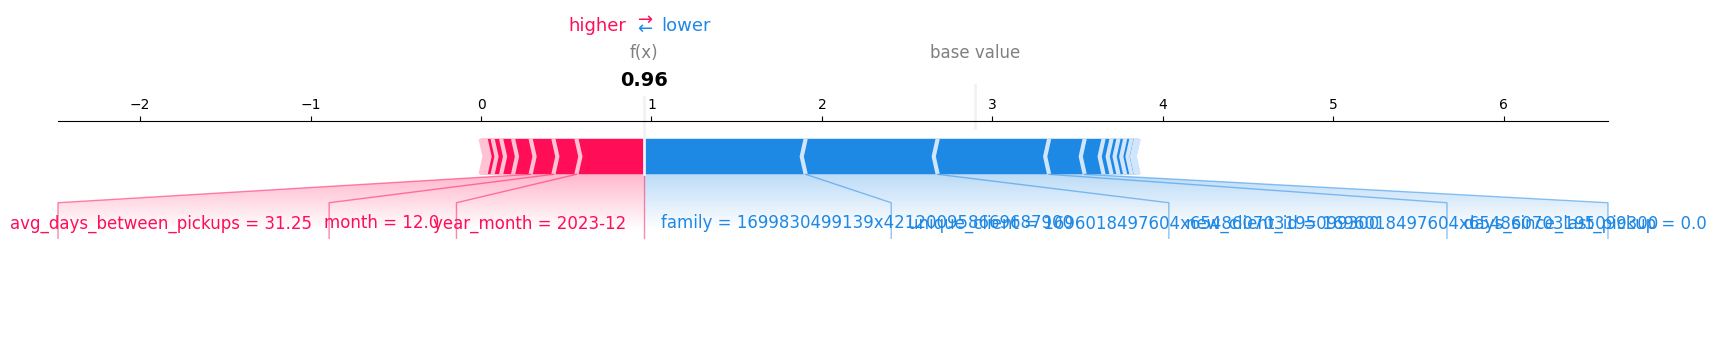

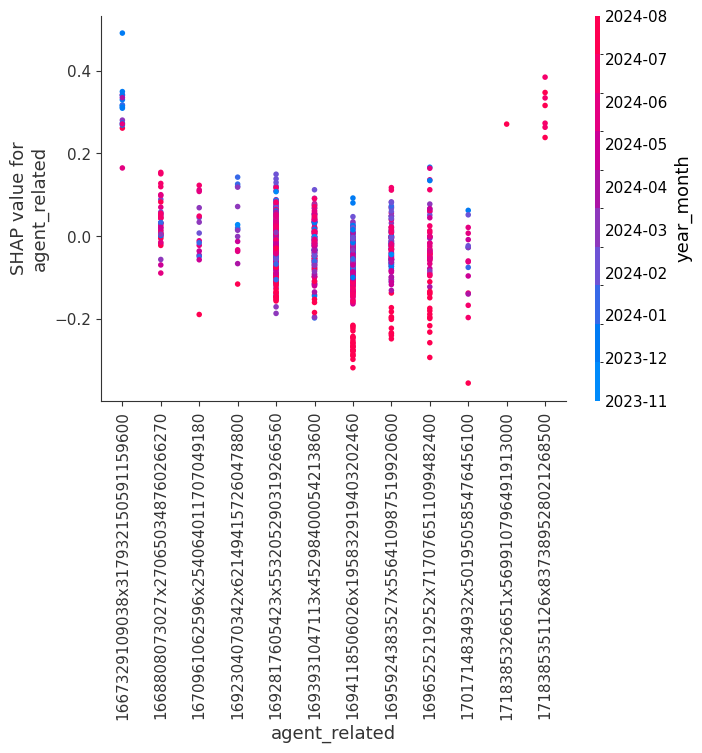

<Figure size 640x480 with 0 Axes>

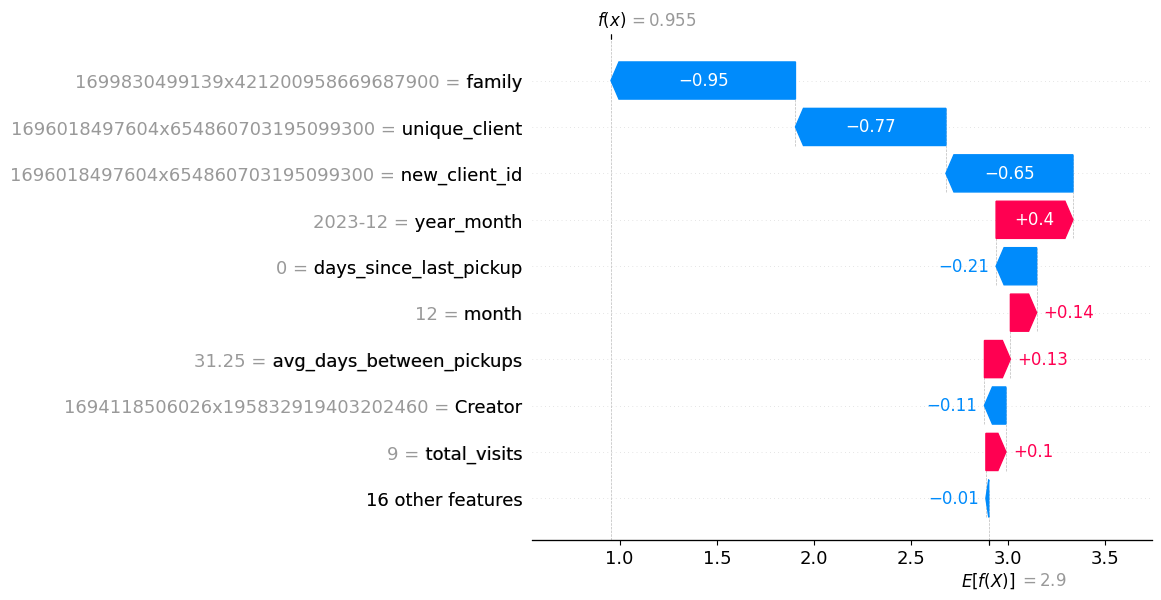

<Figure size 640x480 with 0 Axes>

In [76]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold

# Define Features
categorical_features = [
    'agent_related', 'new_client_id', 'hamper_type', 'related_scheduler', 'unique_client', 'Creator', 'unique id',
    'family', 'household', 'preferred_contact_methods', 'preferred_languages', 'sex',
    'status', 'age_group', 'dw', 'year_month'
]

numerical_features = [
    'dependents_qty', 'days_since_last_pickup', 'days_diff_scheduled_actual',
    'month', 'total_visits', 'avg_days_between_pickups',
    'distance_to_center', 'location_cluster'
]

binary_features = ['is_single_pickup']

# Ensure same clients do not appear in both train & test
unique_clients = df["new_client_id"].unique().tolist()
train_clients = unique_clients[:int(0.8 * len(unique_clients))]
test_clients = unique_clients[int(0.8 * len(unique_clients)):]

train_df = df[df["new_client_id"].isin(train_clients)]
test_df = df[df["new_client_id"].isin(test_clients)]

# Define features and target
X_train = train_df[categorical_features + numerical_features + binary_features]
y_train = train_df["return_binary"]
X_test = test_df[categorical_features + numerical_features + binary_features]
y_test = test_df["return_binary"]

# Preprocessing Pipelines
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features)
    ]
)

# Train Model
catboost_model = CatBoostClassifier(
    iterations=1000, learning_rate=0.05500000000000001, depth=8, l2_leaf_reg=5, verbose=0, random_state=42,
    cat_features=[X_train.columns.get_loc(col) for col in categorical_features]  # CatBoost handles categorical features natively
)
catboost_model.fit(X_train, y_train)

# Explain Model Predictions with SHAP
explainer = shap.Explainer(catboost_model)  # More reliable for CatBoost
shap_values = explainer(X_test)

# Check SHAP values shape
print(f"SHAP values shape: {shap_values.values.shape}")

# Summary plot of SHAP values
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.savefig("shap_summary_plot.png", bbox_inches="tight")  # Ensure full plot is saved


# Force plot for a specific instance
instance_idx = 0

# Ensure correct shape for force plot
# Save as PNG
fig = shap.force_plot(
    explainer.expected_value,
    shap_values.values[instance_idx, :],
    X_test.iloc[instance_idx, :],
    matplotlib=True
)
plt.savefig("shap_force_plot.png", bbox_inches="tight")
plt.close()

# Save as Interactive HTML (optional)
shap.save_html("shap_force_plot.html", shap.force_plot(
    explainer.expected_value,
    shap_values.values[instance_idx, :],
    X_test.iloc[instance_idx, :]
))


# Dependence plot for a feature
feature_name = X_test.columns[0]  # Automatically selecting the first feature
shap.dependence_plot(feature_name, shap_values.values, X_test)
plt.savefig("shap.dependence_plot.png")
plt.show()
plt.close()

# Waterfall plot for a single instance
plt.figure()
shap.waterfall_plot(shap_values[instance_idx])
plt.savefig("shap_waterfall_plot.png")
plt.show()
plt.close()
